In [1]:
from utility.readCsvFile import openCSVFile, readAllCSVFile, readRedTeam
import numpy as np

In [2]:
#mapnames to numbers
#mapUserComputerList[number] = name
mapUserComputerList = []

In [3]:
#test
data,_ = openCSVFile("data/authpartitionaa", mapUserComputerList)
print(data)

In [4]:
#test on one file
np.array(data)
print(np.shape(data))

In [5]:
#read all files
fileNamePrefix = "data/authpartition"
data, mapList = readAllCSVFile(fileNamePrefix)


In [6]:
#check data shape
nparrayData = np.array(data)
print(np.shape(nparrayData))

(2028000, 3)


In [7]:
#separate X,y

X = nparrayData[:,[0,1]]
y = nparrayData[:,[2]]

print(np.shape(X))
print(np.shape(y))

(2028000, 2)
(2028000, 1)


In [8]:
#decision tree
from sklearn import tree

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=110041455, shuffle=False)

In [10]:
#count negative samples (1s)
trainNegSamples = (y_train.ravel()==1).sum()
testNegSamples = (y_test.ravel()==1).sum()
print("Number of neg samples in training set: "+str(trainNegSamples))
print("Number of neg samples in testing set: "+str(testNegSamples))


Number of neg samples in training set: 12278
Number of neg samples in testing set: 1316


In [11]:
decisiontree = tree.DecisionTreeClassifier()
decisiontree = decisiontree.fit(X_train,y_train.ravel())

[Text(103.5438452828616, 213.0912, 'X[1] <= 1159.5\ngini = 0.013\nsamples = 1825200\nvalue = [1812922, 12278]'),
 Text(58.05307591138116, 204.3936, 'X[1] <= 113.5\ngini = 0.004\nsamples = 1477273\nvalue = [1473970, 3303]'),
 Text(30.971976882039126, 195.696, 'X[0] <= 26.5\ngini = 0.004\nsamples = 1371244\nvalue = [1368590, 2654]'),
 Text(15.082868998221697, 186.9984, 'X[1] <= 24.5\ngini = 0.006\nsamples = 629594\nvalue = [627836, 1758]'),
 Text(9.526022525192651, 178.3008, 'X[1] <= 1.5\ngini = 0.004\nsamples = 487160\nvalue = [486303, 857]'),
 Text(8.73218731475993, 169.60320000000002, 'gini = 0.0\nsamples = 120618\nvalue = [120618, 0]'),
 Text(10.319857735625371, 169.60320000000002, 'X[1] <= 9.5\ngini = 0.005\nsamples = 366542\nvalue = [365685, 857]'),
 Text(5.159928867812686, 160.9056, 'X[1] <= 8.5\ngini = 0.009\nsamples = 159059\nvalue = [158327, 732]'),
 Text(3.1753408417308835, 152.208, 'X[1] <= 7.5\ngini = 0.004\nsamples = 87962\nvalue = [87769, 193]'),
 Text(1.5876704208654417, 

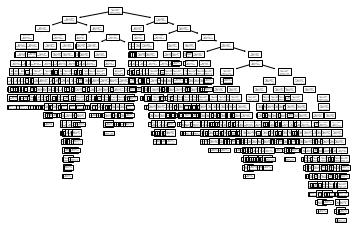

In [12]:
tree.plot_tree(decisiontree)

In [13]:
import pickle

In [14]:
folder = "classifier/"
classifierFileName = "DecisionTreeDefault.sav"
pickle.dump(decisiontree, open(folder+classifierFileName, "wb"))

In [15]:
"""
Load_decisionTree = pickle.load(open(folder+classifierFileName, "rb"))
"""

'\nLoad_decisionTree = pickle.load(open(folder+classifierFileName, "rb"))\n'

In [16]:
testFile = "data/redteam.txt"
testdata, mapList = readRedTeam(testFile, mapList)

In [17]:
testdata = np.array(testdata)

In [18]:
#separate testX,testy

testX = testdata[:,:2]
testy = testdata[:,[2]]

print(np.shape(testX))
print(np.shape(testy))

(749, 2)
(749, 1)


In [19]:
result = decisiontree.score(testX, testy)
print(result)

0.07076101468624833


In [20]:
correct = 0
incorrect = 0

for t in testX:
    result = decisiontree.predict([t])
    #print(result)
    #threshold 0.5
    if result>0.5:
        correct = correct + 1
    else:
        incorrect = incorrect + 1

In [21]:
print("correct: "+str(correct)+" incorrect: "+str(incorrect))

correct: 53 incorrect: 696


In [22]:
#test train data
correct = 0
truepositive = 0
incorrect = 0
counter = 0
for t in X_test:
    result = decisiontree.predict([t])
    #print(result)
    #threshold 0.5
    if result>0.5 and (not y_test[counter] == 0):
        correct = correct + 1
    elif result < 0.5 and y_test[counter] == 0:
        truepositive = truepositive + 1
        correct = correct + 1
    else:
        incorrect = incorrect + 1
    counter = counter + 1

In [23]:
print("correct: "+str(correct)+" truepositive: "+str(truepositive)+" incorrect: "+str(incorrect))

correct: 201986 truepositive: 201189 incorrect: 814
